# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
 
btc_response_data = requests.get(btc_url).json()
#print(json.dumps(btc_response_data, indent=4))

# Fetch current ETH price
eth_response_data = requests.get(eth_url).json()
#print(json.dumps(eth_response_data, indent=4))

# Compute current value of my crpto

btc_current_value = btc_response_data["data"]["1"]["quotes"]["CAD"]["price"]
#print(btc_current_value)
eth_current_value = eth_response_data["data"]["1027"]["quotes"]["CAD"]["price"]
#print(eth_current_value)

print(f"The current market price of BTC is ${btc_current_value:0.2f}")
print(f"The current market price of ETH is ${eth_current_value:0.2f}")

The current market price of BTC is $55987.89
The current market price of ETH is $3942.25


In [6]:
# Print current crypto wallet balance
my_btc_value = my_btc * btc_current_value 
my_eth_value = my_eth * eth_current_value 

#total crypto wallet balance 

total_crypto_balance = my_btc_value + my_eth_value
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")
print(f"Total value of your crypto wallet is:  ${total_crypto_balance:0.2f}")

The current value of your 1.2 BTC is $67185.47
The current value of your 5.3 ETH is $20893.90
Total value of your crypto wallet is:  $88079.37


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret key
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [40]:
# Format current date as ISO format
today = pd.Timestamp("2021-09-22", tz="America/New_York").isoformat()
 
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_Investments = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    #end= end_today,
    limit=1000).df

df_Investments.dropna(inplace=True)
# Drop the time component of the date
df_Investments.index = df_Investments.index.date
# Preview DataFrame
df_Investments.head() 

AGG                                       SPY                   \
              open    high      low   close   volume    open    high      low   
2021-09-22  116.11  116.25  116.005  116.19  6079965  436.05  440.03  433.747   

                              
             close    volume  
2021-09-22  437.83  91135278

In [45]:
# Pick AGG and SPY close prices
agg_close_price = df_Investments["AGG"]["close"].iloc[0]
                                                
spy_close_price = df_Investments["SPY"]["close"].iloc[0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: CAD ${agg_close_price:0.2f}")
print(f"Current SPY closing price: CAD ${spy_close_price:0.2f}")


Current AGG closing price: CAD $116.19
Current SPY closing price: CAD $437.83


In [11]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

#calculate total stock and bond investments
total_investments = my_spy_value + my_agg_value

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"Total value of your stock investments is:  ${total_investments:0.2f}")

The current value of your 50 SPY shares is $21891.50
The current value of your 200 AGG shares is $23238.00
Total value of your stock investments is:  $45129.50


### Savings Health Analysis

In [12]:
# Set monthly household income
monthly_income=12000

In [46]:
# Create savings DataFrame
dict_savings = {'amount': [total_crypto_balance, total_investments]}
index_list = ['crypto', 'shares']
df_savings = pd.DataFrame(data=dict_savings, index=index_list)

# Display savings DataFrame
display(df_savings)

amount
crypto  88079.372599
shares  45129.500000

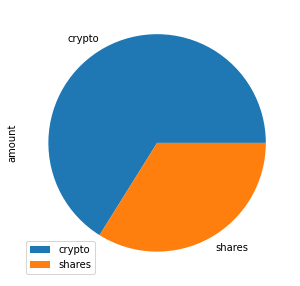

In [47]:
# Plot savings pie chart
plot = df_savings.plot.pie(y='amount', figsize=(5, 5))

In [53]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
print(f"Your ideal emergency fund is: ${emergency_fund:0.2f}")

Your ideal emergency fund is: $36000.00


In [54]:
# Calculate total amount of savings
combined_total_balance = total_crypto_balance + total_investments
print(f"Combined balance with Crypto and Investments: ${combined_total_balance:0.2f}")


Combined balance with Crypto and Investments: $133208.87


In [55]:
# Validate savings health

if combined_total_balance > emergency_fund:
    print("Congratulations! You have enough money in this fund")
elif combined_total_balance == emergency_fund:
        print("congratulating the person on reaching this financial goal.")
else:
     dollars_away = emergency_fund - combined_total_balance 
     print(f"Error: not enough funds! However, you are ${dollars_away:0.2f} from your financial goal")

Congratulations! You have enough money in this fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [17]:
# Get 5 years' worth of historical data for SPY and AGG
# Format current date as ISO format
start_today2 = pd.Timestamp("2016-09-22", tz="America/New_York").isoformat()
stop_today2 = pd.Timestamp("2021-09-22", tz="America/New_York").isoformat()

In [18]:
# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data2 = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_today2,
    end = stop_today2,
    limit=1000).df

#drop null values 
df_stock_data2.dropna(inplace=True)

# Drop the time component of the date
df_stock_data2.index = df_stock_data2.index.date
# Preview DataFrame
#df_stock_data2.tail()

# Display sample data
df_stock_data2.head()

AGG                                          SPY          \
              open    high       low   close     volume    open    high   
2017-10-03  109.46  109.54  109.4000  109.52  2243369.0  252.46  252.89   
2017-10-04  109.56  109.57  109.4100  109.50  2130907.0  252.69  253.44   
2017-10-05  109.54  109.54  109.3701  109.44  1586971.0  253.51  254.68   
2017-10-06  109.22  109.42  109.1499  109.29  1587251.0  254.15  254.46   
2017-10-09  109.35  109.42  109.3146  109.40  1000706.0  254.63  254.70   

                                        
               low   close      volume  
2017-10-03  252.23  252.85  33875099.0  
2017-10-04  252.56  253.16  30217246.0  
2017-10-05  253.40  254.64  45350955.0  
2017-10-06  253.85  254.40  40706912.0  
2017-10-09  253.65  253.96  23554888.0

In [19]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

# using a 40 / 60 ratio 
MC_thirty_year = MCSimulation(
    portfolio_data = df_stock_data2,
    weights = [.40, .60 ],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [20]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()

AGG                                                       SPY  \
              open    high       low   close     volume daily_return    open   
2017-10-03  109.46  109.54  109.4000  109.52  2243369.0          NaN  252.46   
2017-10-04  109.56  109.57  109.4100  109.50  2130907.0    -0.000183  252.69   
2017-10-05  109.54  109.54  109.3701  109.44  1586971.0    -0.000548  253.51   
2017-10-06  109.22  109.42  109.1499  109.29  1587251.0    -0.001371  254.15   
2017-10-09  109.35  109.42  109.3146  109.40  1000706.0     0.001006  254.63   

                                                             
              high     low   close      volume daily_return  
2017-10-03  252.89  252.23  252.85  33875099.0          NaN  
2017-10-04  253.44  252.56  253.16  30217246.0     0.001226  
2017-10-05  254.68  253.40  254.64  45350955.0     0.005846  
2017-10-06  254.46  253.85  254.40  40706912.0    -0.000943  
2017-10-09  254.70  253.65  253.96  23554888.0    -0.001730

In [21]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0          1          2          3         4          5    \
0      1.000000   1.000000   1.000000   1.000000  1.000000   1.000000   
1      1.002099   1.015532   0.992747   0.999397  1.001782   0.994316   
2      0.996824   1.019885   0.997699   1.006582  1.009388   0.991377   
3      0.998329   1.029090   1.001823   1.007643  0.988505   1.006555   
4      1.005361   1.042726   1.007964   1.004817  0.978730   1.019085   
...         ...        ...        ...        ...       ...        ...   
7556  16.957499  16.487698  17.329181  12.810238  9.638765  14.500531   
7557  17.067094  16.350168  17.174830  12.834988  9.723045  14.345317   
7558  17.073082  16.328422  17.313896  12.826888  9.785582  14.345218   
7559  17.086177  16.146027  17.544791  12.895082  9.821401  14.313051   
7560  16.765938  16.182848  17.893159  12.871826  9.637804  14.202383   

           6          7          8          9    ...       490        491  \
0     1.000000   1.000000   1.000000   1.000000  ...  1.000000   1.000000   
1     0.981152   0.997594   1.006569   0.993195  ...  1.001057   0.984767   
2     0.975164   0.994932   1.013014   0.993639  ...  0.992693   0.995500   
3     0.975715   0.996043   1.013849   0.992047  ...  0.986537   0.999131   
4     0.972218   0.997222   1.021376   0.990112  ...  0.983316   1.018016   
...        ...        ...        ...        ...  ...       ...        ...   
7556  5.431992  17.982063  78.282221  38.039024  ...  8.049728  60.232018   
7557  5.534792  18.112810  79.905162  38.324636  ...  8.092378  59.805444   
7558  5.555170  18.152787  80.329097  37.696410  ...  8.205808  60.020338   
7559  5.480468  18.132605  79.294279  38.083014  ...  8.357845  61.249713   
7560  5.525752  18.092659  78.788227  38.453518  ...  8.385784  60.454470   

            492        493        494        495        496       497  \
0      1.000000   1.000000   1.000000   1.000000   1.000000  1.000000   
1      0.995524   1.017597   1.001803   1.006979   0.991690  1.006162   
2      0.991179   1.025189   1.005746   1.003242   1.009856  0.999729   
3      0.997211   1.024383   0.982547   1.013628   1.003103  1.019668   
4      1.002621   1.029072   0.987848   1.005082   1.005545  1.022801   
...         ...        ...        ...        ...        ...       ...   
7556  51.530179  20.835452  60.833313  16.323420  15.209317  7.946911   
7557  52.152013  20.957460  61.709258  16.306769  15.157777  7.877442   
7558  52.136611  20.958370  62.117324  16.304318  15.058895  7.948374   
7559  51.889310  20.937320  62.489130  16.365534  15.131103  7.926299   
7560  51.774385  20.947876  62.642180  16.468019  14.794930  7.743108   

            498        499  
0      1.000000   1.000000  
1      0.993031   0.991975  
2      0.989857   0.983893  
3      0.995398   0.985982  
4      1.002958   0.973518  
...         ...        ...  
7556  11.671623  12.155307  
7557  11.576007  12.247700  
7558  11.608646  12.117311  
7559  11.678430  12.038737  
7560  11.755398  12.060375  

[7561 rows x 500 columns]

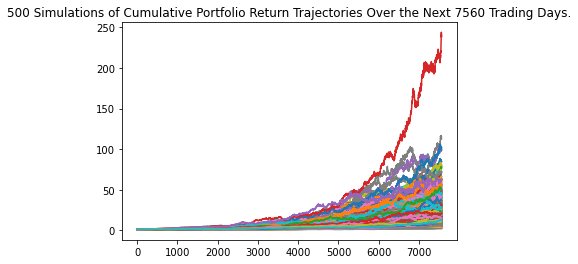

In [22]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()
# Save the plot for future usage
line_plot.get_figure().savefig("MC_thirty_year.png", bbox_inches="tight")

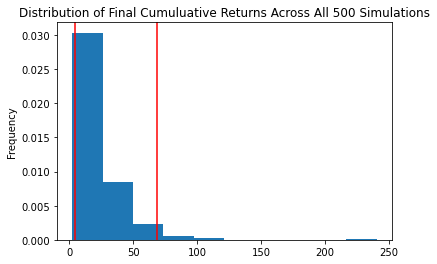

In [23]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()

### Retirement Analysis

In [24]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             22.735616
std              19.753561
min               2.325056
25%              10.445811
50%              16.580699
75%              28.373016
max             240.187480
95% CI Lower      4.381088
95% CI Upper     68.939700
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [25]:
# Set initial investment to 20000
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $87621.76 and $1378793.99


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [26]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $131432.65 and $2068190.99


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [27]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
 
#as per the question, changing the ratio to higher stock, so 30% bond 70% stocks. 

MC_five_year = MCSimulation(
    portfolio_data = df_stock_data2,
    weights = [.30, .70 ],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [28]:
# commented out. included for testing purposes only 
#MC_five_year.portfolio_data.head()

In [29]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.004432  0.999891  1.002084  1.011481  1.016773  1.018265  0.977847   
2     1.004283  0.991840  0.994395  1.009306  1.013098  1.004518  0.965967   
3     1.014890  0.989972  0.992860  1.003883  1.023393  1.004352  0.955699   
4     1.035619  0.987202  0.996854  1.006903  1.040747  0.999529  0.965804   
...        ...       ...       ...       ...       ...       ...       ...   
1256  1.580719  1.475533  1.197148  1.613845  1.271437  1.524050  1.428092   
1257  1.586084  1.496560  1.204365  1.623853  1.267826  1.540181  1.460819   
1258  1.605107  1.489387  1.207139  1.635324  1.270254  1.527761  1.472276   
1259  1.616789  1.486231  1.204550  1.674762  1.263772  1.530044  1.476924   
1260  1.600000  1.470878  1.195117  1.688062  1.274612  1.513469  1.491140   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.009907  0.994521  0.994777  ...  1.010324  1.007680  1.010988   
2     1.001836  0.989100  0.985534  ...  1.002298  1.007960  1.008472   
3     0.988091  0.978394  0.994941  ...  1.003819  0.992910  1.019510   
4     0.987087  0.981867  0.980701  ...  0.995146  0.991851  1.010061   
...        ...       ...       ...  ...       ...       ...       ...   
1256  1.259920  1.996995  0.739717  ...  1.631663  1.153340  2.380598   
1257  1.268791  1.996974  0.736279  ...  1.647127  1.137408  2.362319   
1258  1.253849  2.033301  0.738760  ...  1.631412  1.149283  2.373898   
1259  1.256508  2.038159  0.740900  ...  1.627457  1.147480  2.415173   
1260  1.268689  2.021313  0.751450  ...  1.612892  1.129639  2.391991   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.006259  1.001459  0.993472  0.997403  1.003213  0.987675  1.005115  
2     0.998668  1.019531  0.999965  0.996801  1.004153  0.990854  0.991048  
3     0.996397  1.018575  1.022450  0.985564  1.000582  0.987602  0.997648  
4     1.003900  1.019103  1.029658  0.985941  0.990323  0.984317  0.996268  
...        ...       ...       ...       ...       ...       ...       ...  
1256  2.443436  1.840705  1.615569  1.916169  0.997578  0.878146  0.978292  
1257  2.417266  1.852916  1.631008  1.912141  1.011459  0.874027  0.987409  
1258  2.412300  1.869712  1.638751  1.902234  0.987032  0.881161  0.983343  
1259  2.426731  1.860195  1.645801  1.895159  1.001252  0.874830  0.968941  
1260  2.443145  1.896043  1.669766  1.888082  1.012336  0.880433  0.964797  

[1261 rows x 500 columns]

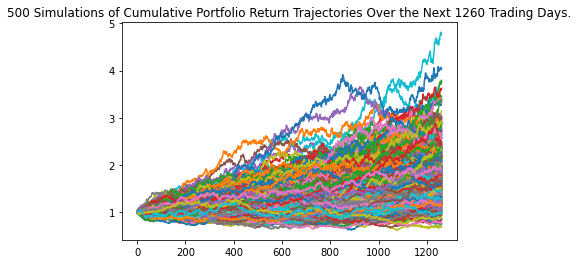

In [30]:
# Plot simulation outcomes
line_plot2 = MC_five_year.plot_simulation()
# Save the plot for future usage
line_plot2.get_figure().savefig("MC_five_year.png", bbox_inches="tight")

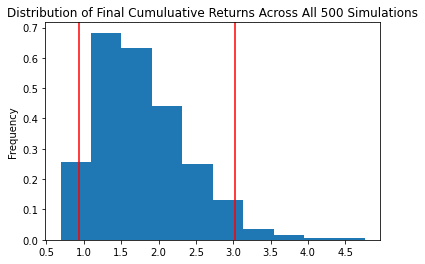

In [31]:
# Plot probability distribution and confidence intervals
dist_plot2 = MC_five_year.plot_distribution()

In [32]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl2 = MC_five_year.summarize_cumulative_return()

# Print summary statistics
print(tbl2)

count           500.000000
mean              1.781967
std               0.601774
min               0.688866
25%               1.329127
50%               1.695945
75%               2.154705
max               4.760115
95% CI Lower      0.936873
95% CI Upper      3.023526
Name: 1260, dtype: float64


In [33]:
# as per starter code, initalizing new investment to $60000
initial_investment2 = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five= round(tbl[8]*initial_investment2,2)
ci_upper_five = round(tbl[9]*initial_investment2,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment2} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 30 years will end within in the range of $262865.29 and $4136381.97


### Ten Years Retirement Option

In [34]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year = MCSimulation(
    portfolio_data = df_stock_data2,
    weights = [.30, .70 ],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [35]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
 
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.001653  0.988280  0.983747  0.992943  1.007714  1.009966  1.002026   
2     0.999048  0.982624  0.989429  1.008122  1.011504  1.013143  1.009885   
3     0.995298  0.978432  0.987878  1.006477  1.021519  1.031884  1.009193   
4     0.988538  0.990941  0.984385  1.000652  1.005709  1.036837  1.020429   
...        ...       ...       ...       ...       ...       ...       ...   
2516  4.085998  3.917652  2.748322  2.107423  2.907015  7.288314  3.563835   
2517  4.059784  3.930317  2.765355  2.082232  2.923409  7.221374  3.563465   
2518  4.113039  3.942014  2.822676  2.095861  2.936222  7.220342  3.563416   
2519  4.127931  3.961527  2.815738  2.072871  2.942069  7.342544  3.544828   
2520  4.157858  3.983196  2.859349  2.073062  2.906967  7.321596  3.575245   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.997459  1.003843  0.990646  ...  0.994996  1.001595  0.999031   
2     0.992568  1.006005  0.989012  ...  0.990844  0.991535  1.007808   
3     0.994974  0.993633  0.988091  ...  0.988069  0.998287  0.996235   
4     0.997794  0.996593  0.992859  ...  0.974002  0.986295  0.991528   
...        ...       ...       ...  ...       ...       ...       ...   
2516  1.800252  1.396542  2.864818  ...  2.180817  6.124921  2.857007   
2517  1.786996  1.424455  2.779059  ...  2.183635  6.135910  2.826350   
2518  1.801032  1.447485  2.786317  ...  2.159074  6.256048  2.821061   
2519  1.812576  1.468516  2.808771  ...  2.169298  6.302676  2.830245   
2520  1.816301  1.461352  2.818278  ...  2.157304  6.312119  2.850276   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.997823  1.010820  1.013064  1.004780  0.996437  0.997046  0.998578  
2     1.000928  1.017090  1.010433  1.009761  0.966775  1.014851  0.981449  
3     0.991884  1.018399  1.001240  1.020991  0.956861  1.025431  0.992633  
4     0.983825  1.017985  0.987067  1.021436  0.955367  1.038216  1.004422  
...        ...       ...       ...       ...       ...       ...       ...  
2516  2.206066  3.583063  4.491503  3.383511  3.055927  2.716279  3.819145  
2517  2.186055  3.586967  4.463864  3.391879  3.033686  2.717570  3.803646  
2518  2.176879  3.616515  4.482731  3.421547  3.035836  2.733450  3.780536  
2519  2.190689  3.585126  4.425460  3.360840  3.038076  2.774912  3.822110  
2520  2.208273  3.628850  4.418718  3.412458  3.022133  2.805636  3.824114  

[2521 rows x 500 columns]

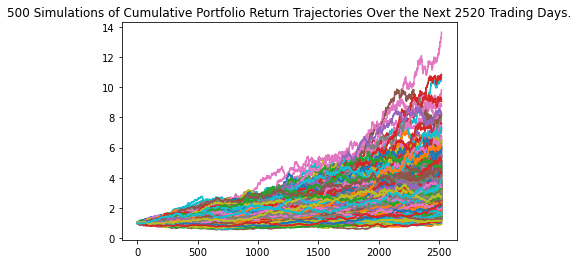

In [36]:
# Plot simulation outcomes
line_plot3 = MC_ten_year.plot_simulation()
# Save the plot for future usage
line_plot3.get_figure().savefig("MC_ten_year.png", bbox_inches="tight")

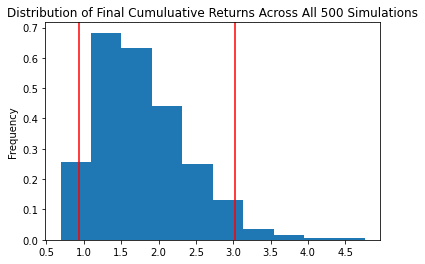

In [37]:
# Plot probability distribution and confidence intervals
dist_plot3 = MC_five_year.plot_distribution()

In [38]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl3 = MC_five_year.summarize_cumulative_return()

# Print summary statistics
print(tbl3)

count           500.000000
mean              1.781967
std               0.601774
min               0.688866
25%               1.329127
50%               1.695945
75%               2.154705
max               4.760115
95% CI Lower      0.936873
95% CI Upper      3.023526
Name: 1260, dtype: float64


In [39]:
# as per starter code, initalizing new investment to $60000
initial_investment3 = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten= round(tbl[8]*initial_investment3,2)
ci_upper_ten = round(tbl[9]*initial_investment3,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment3} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $262865.29 and $4136381.97
